Посмотрим, как ой вклад в образование продольной завихрености дает каждое из слагаемых в уравненийй. Затем возможно удастся ассоциировать эти слагаемые с конкретным физическим механизмом. 

Системы уравнений для завихрености
$$
\frac{\partial \vec \omega}{\partial t} + (\vec v , \nabla) \vec \omega - (\vec \omega , \nabla) \vec v = \nu \Delta \vec \omega
$$

Здесь производная завихрености по рвемени складывается из трех частей: конфекция, деформация вихревых линий и вязкая диссипация. Если вспомнить физический смысл воторого слагаемого, то его можно переписать в дрругом виде

$$ 
(\vec \omega , \nabla ) \vec v = \Phi \vec \omega
$$

Здесь $\Phi -$ тензор скоростей деформаций. Формулу еще нужно проверить. 

Проектируя уравнение на ось трубы получаем уравнение на продольную компоненты завихрености $\omega_x$

$$
\frac{\partial \omega_x}{\partial t} = - u \frac{\partial \omega_x}{\partial x} - v \frac{\partial \omega_x}{\partial r} - \frac{w}{r} \frac{\partial \omega_x}{\partial \theta} + \omega_x \frac{\partial u}{\partial x} + \omega_r \frac{\partial u}{\partial r} + \frac{\omega_\theta}{r} \frac{\partial u}{\partial \theta} + \nu \Delta \omega_x
$$

или

$$
\omega_x \frac{\partial u}{\partial x} + \omega_r \frac{1}{2} \left ( \frac{\partial u}{\partial r} + \frac{\partial v}{\partial x} \right) + \omega_\theta \frac{1}{2} \left( \frac{\partial u}{r \partial \theta} + \frac{\partial w}{\partial x} \right)
$$

В первую очередь интерес предствляет именно второе и третье слагаемые, но по большей части они равны друг другу по значению и противоположны по знаку. В случае поле скорости не зависит от х, они в сумме дают точно ноль. Можно выделить из них ту часть, котороя зависит от х, и считать только ее. 

$$
\omega_r \frac{\partial u}{\partial r} + \omega_\theta \frac{\partial u}{r \partial \theta} = 
\left( \frac{\partial u}{r \partial \theta} - \frac{\partial w}{\partial x} \right)  \frac{\partial u}{\partial r} + 
\left( \frac{\partial v}{\partial x} - \frac{\partial u}{\partial r} \right)  \frac{\partial u}{r \partial \theta} =
- \frac{\partial w}{\partial x} \frac{\partial u}{\partial r} + \frac{\partial v}{\partial x} \frac{\partial u}{r \partial \theta} 
$$

In [1]:
import tools
import pipeSym_func as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pipeSym_func as sys
import math

In [3]:
t, dt, cf, Re, vel0 = sym.read_cp("../orig-edge/Re2200.scp")

In [4]:
sym.look()

Xmax=120.000000, epsr=0.250000, nsym=2
Im=1024, Jm=40, Km=32
hx=0.117188, ht=0.049087, real_nsym=2.000000
Re=2200.000000


In [6]:
print t, dt, cf, Re, vel0.max()

0.0 0.298062277094 0.688934885581 2200.0 0.99988305398


In [7]:
Im = sym.wr.dimx.Im
Jm = sym.wr.dimr.Jm
Km = sym.wr.dimt.Km

In [8]:
def deform2_nnn(vel):
    u,v,w = vel
    
    ur_nnf = sym.new_z_pfield()
    for k in range(1,Km+1):
        for j in range(1,Jm+1):
            for i in range(1,Im+1):
                ur_nnf[k,j,i] = (u[k,j+1,i] - u[k,j,i]) / sym.wr.dimr.rt1[j] 
    
    ur_nnn = sym.new_z_pfield()
    for k in range(1,Km+1):
        for j in range(1,Jm+1):
            for i in range(1,Im+1):
                ur_nnn[k,j,i] = (ur_nnf[k+1,j,i] + ur_nnf[k,j,i])/2
    
    wx_nfn = sys.new_z_pfield()
    for k in range(1,Km+1):
        for j in range(1,Jm+1):
            for i in range(1,Im+1):
                wx_nfn[k,j,i] = (w[k,j,i+1] - w[k,j,i]) / sym.wr.dimx.hx
    
    wx_nnn = sym.new_z_pfield()
    for k in range(1,Km+1):
        for j in range(1,Jm+1):
            for i in range(1,Im+1):
                wx_nnn[k,j,i] = (wx_nfn[k,j+1,i] + wx_nfn[k,j,i])/2
                
    return - ur_nnn * wx_nnn

In [9]:
def deform3_nnn(vel):
    u,v,w = vel
    
    ut_nfn = sym.new_z_pfield()
    for k in range(1,Km+1):
        for j in range(1,Jm+1):
            for i in range(1,Im+1):
                ut_nfn[k,j,i] = (u[k+1,j,i] - u[k,j,i]) / (sym.wr.dimr.yt[j-1] * sym.wr.dimt.ht)
    
    ut_nnn = sym.new_z_pfield()
    for k in range(1,Km+1):
        for j in range(1,Jm+1):
            for i in range(1,Im+1):
                ut_nnn[k,j,i] = (ut_nfn[k,j+1,i] + ut_nfn[k,j,i])/2
               
    vx_nnf = sym.new_z_pfield()
    for k in range(1,Km+1):
        for j in range(1,Jm+1):
            for i in range(1,Im+1):
                vx_nnf[k,j,i] = (v[k,j,i+1] - v[k,j,i]) / sym.wr.dimx.hx
                
    vx_nnn = sym.new_z_pfield()
    for k in range(1,Km+1):
        for j in range(1,Jm+1):
            for i in range(1,Im+1):
                vx_nnn[k,j,i] = (vx_nnf[k+1,j,i] + vx_nnf[k,j,i])/2
                
    return ut_nnn * vx_nnn

In [10]:
def plot(n, fname, vel, om, diform1, diform2, time, ishift=0):
    
    if (n == 0): mode = "w"
    else: mode = "a"
        
    with open(fname, mode) as f:
        
        if (n == 0): f.write('VARIABLES="X" "Y" "Z" "R" "U" "OX" "d2" "d3"\n')
        f.write('ZONE I=%d J=%d K=%d\n' % (Im/4, Jm/2, Km/2))
        f.write('SOLUTIONTIME=%f\n' % time)
        if (n > 0): f.write('VARSHARELIST=([1-4])\n')
        ucl = vel[1:-1,1,:].mean(0)
        
        for k in range(1,Km+1,2):
            for j in range(1,Jm+1,2):
                for i in range(1,Im+1,4):
                    x = i * sym.wr.dimx.hx
                    th = k * sym.wr.dimt.ht
                    ii = (i + ishift - 1) % Im + 1
                     
                    r = sym.wr.dimr.rt[j]
                    u = vel[k,j,ii] - (1.0 - r**2)
                    ox = (om[k,j,i] + om[k,j,i+1])/2
                    d1 = diform1[k,j,ii]
                    d2 = diform2[k,j,ii]
                    
                    y = r * math.cos(th)
                    z = r * math.sin(th)
                    
                    if (n == 0): f.write("%6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f %6.3f\n" % (x,y,z,r,u,ox,d1,d2))
                    else: f.write("%6.3f %6.3f %6.3f %6.3f\n" % (u,ox,d1,d2))
                    
        f.close()
    return

In [16]:
class PRT_deform:
    def __init__(x):
        x.deform = sym.new_z_vfield()
        x.n = 0

    def __call__(x, nstep, time, dt, vel, velt, om, p, cf):
        deform2 = deform2_nnn(vel)
        deform3 = deform3_nnn(vel)
        
        if nstep % 5 == 0:
            print '+',
            plot(nstep, "part_deform_video.dat", vel[0], om[0], deform2, deform3, time)
        else:
            print '-',
            
        x.deform[1] += deform2
        x.deform[2] += deform3
        x.n += 1
        
    def get(x):
        return x.deform/x.n

In [17]:
prt_deform = PRT_deform()

In [18]:
res = sym.calc(vel0, dt, cf, Re, maxnstep=200, prt=prt_deform, const_dt_chec=True)

+ - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - + - - - - Planned break! maxnstep reached


/home/user/miniconda/lib/python2.7/site-packages/pipeSym_func.py:155: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Re != None): wr.Re.Re = Re


In [19]:
t1, dt1, vel1 = res[:3]

In [20]:
print t1, dt1, np.abs(vel1-vel0)[:,1:-1,1:-1,1:-1].max()

59.6124554189 0.298062277094 0.0


In [21]:
deform = prt_deform.get()

In [22]:
sym.write_cp("part_deform_mean.scp", deform)

In [7]:
t, dt, cf, Re, deform = sym.read_cp("part_deform_mean.scp")

In [4]:
sym.look()

Xmax=120.000000, epsr=0.250000, nsym=2
Im=1024, Jm=40, Km=32
hx=0.117188, ht=0.049087, real_nsym=2.000000
Re=2200.000000


In [6]:
t, dt, cf, Re

(0.0, 0.1, 0.0, array(2200.0))

In [8]:
t, dt, cf, Re, velm = sym.read_cp("../orig-edge/Re2200-mean.scp")

(600, 1000)

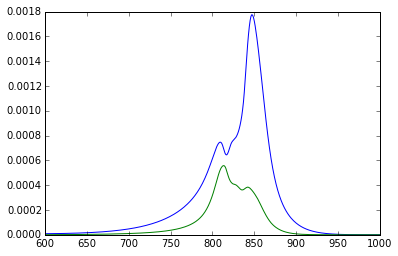

In [27]:
v1 = tools.cs_mean(np.abs(deform[1]), sym.wr.dimr.Jm, sym.wr.dim.epsr, sym.wr.dimt.lt, sym.wr.dim.nsym)
v2 = tools.cs_mean(np.abs(deform[2]), sym.wr.dimr.Jm, sym.wr.dim.epsr, sym.wr.dimt.lt, sym.wr.dim.nsym)

plt.plot(v1)
plt.plot(v2)
#plt.plot(v1+v2)
plt.xlim(600,1000)

In [25]:
deform[1].max()

0.006919931619869423

In [ ]:
plt.plot(tools.cs_mean(deform[1], sym.wr.dimr.Jm, sym.wr.dim.epsr, sym.wr.dimt.lt, sym.wr.dim.nsym))